# Clustering Analysis: K-means clustering

### 1. Load Packages

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
# import the KMeans clustering model from scikit-learn
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Read the Data

In [2]:
# Using the method 'read_csv' from pandas (pd) we will read our data
df = pd.read_csv('../../../Data/Cluster.csv',index_col='T',parse_dates=True)
# Convert the data into an array
A = df.values

### 3. Train the K-Means model

In [3]:
# Initialise the model for two clusters, "n_init" defines the number of time the k-means 
# algorithm will be run with different centroid seeds. and "init" defines the initialization for the clusters
# we will use random
k_means = KMeans(n_clusters=2, n_init=10, init='random')
# Train the model on the data
k_means.fit(A)
# save the calues for the labels (list of clusters to which each element of the data belongs) 
# and the centers of the clusters
labels = k_means.labels_
centers = k_means.cluster_centers_


### 4. Plotting the results

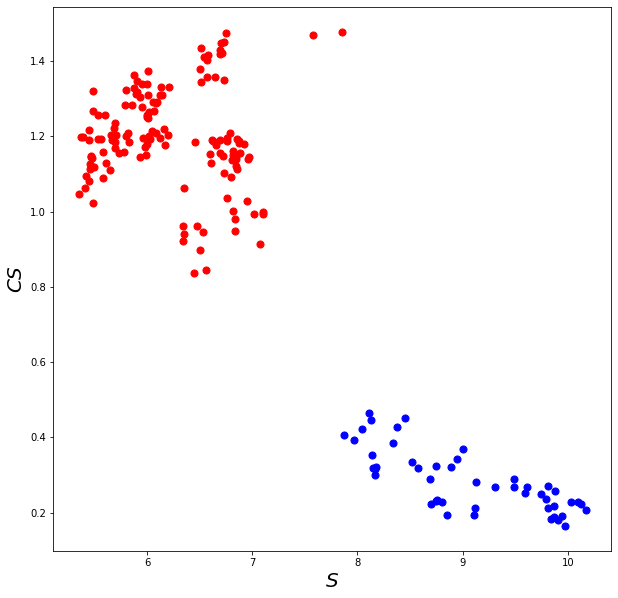

In [4]:
fig = plt.figure(figsize=[10,10])
# get the elemnets that belong to cluster 0
idx_0 = labels ==0
# Plot the cluster 0 elements in red
plt.scatter(A[idx_0,0],A[idx_0,1],s=50,color='red')
# get elements that belong to cluster 1
idx_0 = labels ==1
# Plot the elemntes of cluster 1 in blue
plt.scatter(A[idx_0,0],A[idx_0,1],s=50,color='blue')
plt.xlabel('$S$',fontsize=20)
plt.ylabel('$CS$',fontsize=20);

### 5. Using 3 clusters

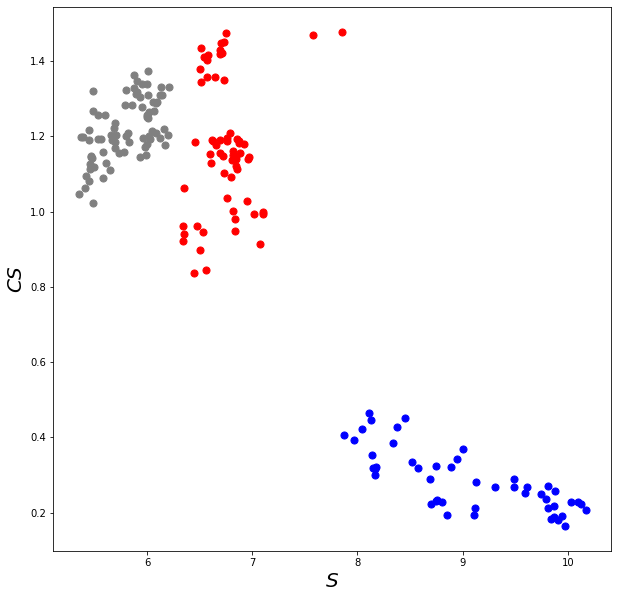

In [5]:
# Initialize the model but this time w will ask for 3 clusters
k_means = KMeans(n_clusters=3, n_init=10,init='random')
k_means.fit(A)
# get labels and scores
labels = k_means.labels_
centers = k_means.cluster_centers_
fig = plt.figure(figsize=[10,10])
# Pot elements in cluster 0, 1 and 2
idx_0 = labels ==0
plt.scatter(A[idx_0,0],A[idx_0,1],s=50,color='red')
idx_0 = labels ==1
plt.scatter(A[idx_0,0],A[idx_0,1],s=50,color='blue')
idx_2 = labels ==2
plt.scatter(A[idx_2,0],A[idx_2,1],s=50,color='gray')
plt.xlabel('$S$',fontsize=20)
plt.ylabel('$CS$',fontsize=20);

### Try the same analysis but this time for 5 clusters, We will see the evolution of the clustering as the number of max iterations increases

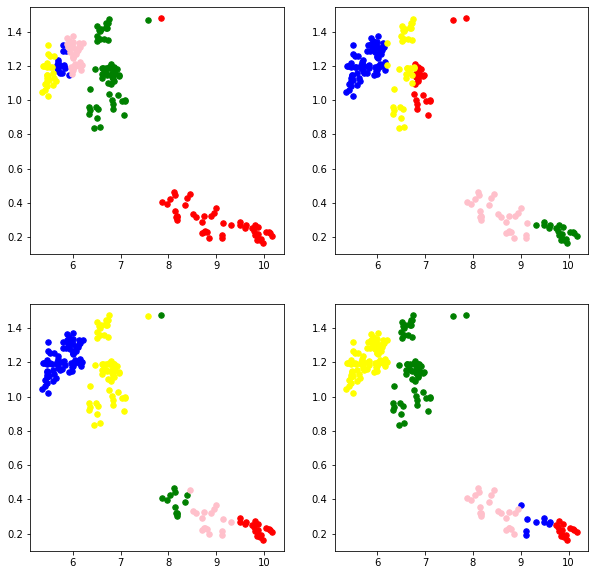

In [6]:
fig = plt.figure(figsize=[10,10])
i=0
# Iterate over different values for the number of iterations
for n in [1,2,3,4]:
    i += 1
    ax=plt.subplot(2,2,i)
    # Calculate the clustering for the current number of iterations 
    k_means = KMeans(n_clusters=5, n_init=1,init='random',max_iter=n)
    k_means.fit(A)
    labels = k_means.labels_
    idx_0 = labels ==0
    ax.scatter(A[idx_0,0],A[idx_0,1],s=30, color='red')
    idx_1 = labels ==1
    ax.scatter(A[idx_1,0],A[idx_1,1],s=30, color='blue')
    idx_2 = labels ==2
    ax.scatter(A[idx_2,0],A[idx_2,1],s=30, color='yellow')    
    idx_3 = labels ==3
    ax.scatter(A[idx_3,0],A[idx_3,1],s=30, color='green') 
    idx_4 = labels ==4
    ax.scatter(A[idx_4,0],A[idx_4,1],s=30, color='pink') 

### Evaluate the evolution of the clusters with increasing values of inertia for different number of clusters

Text(0, 0.5, 'inertia_')

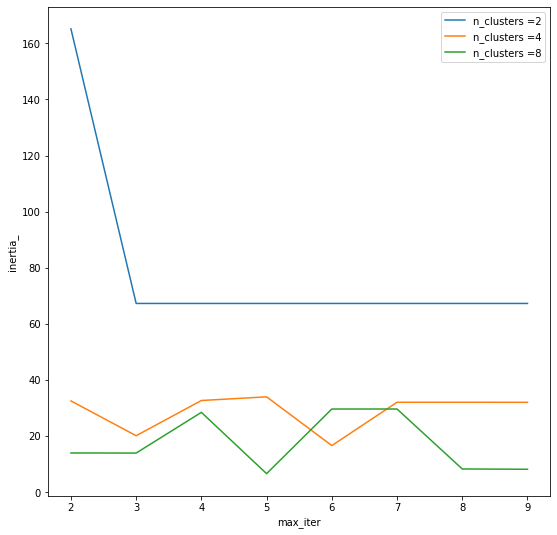

In [7]:
# array of values to use for the "max_iter" parameter
nbr = np.arange(2,10,1)
# Number of k clusters to use
clusters = [2, 4, 8]
dist = np.zeros(shape=(len(nbr), len(clusters)))
i = 0
for n in nbr:
    j = 0
    # Iterate over the cluster values
    for c in clusters:
        # Compute the Kmeans algorithm
        k_means = KMeans(n_clusters=c, n_init=1,init='random',max_iter=n)
        k_means.fit(A)
        dist[i,j] = k_means.inertia_
        j +=1
    i += 1
    

fig = plt.figure(figsize=(9,9))
i=0
# Plot the results for each cluster
for c in clusters:
    plt.plot(nbr,dist[:,i],label='n_clusters =' + str(c))
    i +=1
plt.legend() 
plt.xlabel('max_iter')
plt.ylabel('inertia_')

### Danger of overfitting

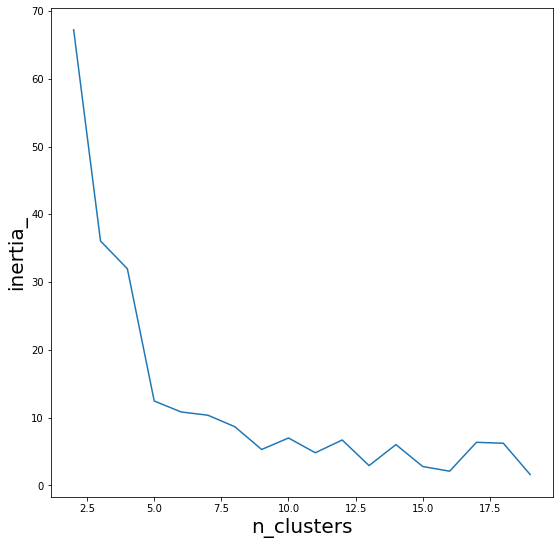

In [8]:
# Array for the number of clusters, min = 2 while max =20
clusters = np.arange(2,20,1)
dist = np.zeros(shape=(len(clusters),1))
i = 0
# Iterate ove all numbers of clusters
for c in clusters:
    k_means = KMeans(n_clusters=c, n_init=1,init='random')
    k_means.fit(A)
    dist[i,0]=k_means.inertia_
    i +=1
# Print the inertia vs the number of clusters used by the algorithm
fig = plt.figure(figsize=(9,9))
plt.plot(clusters,dist[:,0])
plt.xlabel('n_clusters',fontsize=20)
plt.ylabel('inertia_',fontsize=20);